After manually fixing the auto-labeled data from our finetune_v1 model, in this notebook we fine-tune yolov8s from scratch on our new dataset (size 199 images -> 782) (after data augmentation (done by roboflow) ~1900 images).

In [ ]:
!pip install ultralytics
!pip install supervision==0.24.0
!pip install PyYAML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.4/982.4 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [ ]:
!cp "/content/drive/MyDrive/Walmart_AI_Project/roboflow_dataset2.zip" "/content/"
!unzip /content/roboflow_dataset2.zip -d /content/

Archive:  /content/roboflow_dataset2.zip
   creating: /content/roboflow_dataset2/
  inflating: /content/roboflow_dataset2/data.yaml  
  inflating: /content/roboflow_dataset2/README.dataset.txt  
  inflating: /content/roboflow_dataset2/README.roboflow.txt  
   creating: /content/roboflow_dataset2/test/
   creating: /content/roboflow_dataset2/test/images/
  inflating: /content/roboflow_dataset2/test/images/20250420_185319_jpg.rf.4e52c2d0a01d753a5aaf2bddd0235781.jpg  
  inflating: /content/roboflow_dataset2/test/images/20250420_185321_jpg.rf.0ee54725b15ed3af1cf44b4f61a4fcc1.jpg  
  inflating: /content/roboflow_dataset2/test/images/20250420_185323_jpg.rf.ea844795712b3522cdbfb6cd28eabf81.jpg  
  inflating: /content/roboflow_dataset2/test/images/20250420_185333_jpg.rf.98e1f858c0e227510dafaa987e884108.jpg  
  inflating: /content/roboflow_dataset2/test/images/20250420_185335_jpg.rf.74afc6ef733fe5fd386b14fc05492e09.jpg  
  inflating: /content/roboflow_dataset2/test/images/20250420_185354_jpg.rf

Get class names from dataset data.yaml file

In [ ]:
import yaml
import os

yaml_file_path = '/content/roboflow_dataset2/data.yaml'

class_names = []


# Open and read the YAML file
with open(yaml_file_path, 'r') as stream:
    data_yaml = yaml.safe_load(stream)

    # Check if loading was successful and it's a dictionary
    if isinstance(data_yaml, dict):
        # Access the list associated with the 'names' key
        extracted_names = data_yaml.get('names')

        if extracted_names is None:
            print(f"Error: 'names' key not found in '{yaml_file_path}'")
        elif not isinstance(extracted_names, list):
              print(f"Error: Value associated with 'names' key in '{yaml_file_path}' is not a list (found type: {type(extracted_names)}).")
        else:
            class_names = extracted_names # Assign the extracted list
            print(f"Successfully extracted {len(class_names)} class names from '{yaml_file_path}'.")

    else:
          print(f"Error: Content of '{yaml_file_path}' is not a valid YAML dictionary (parsed as type: {type(data_yaml)}).")

print("\nExtracted Class Names List:")
print(class_names)

# Print names with their corresponding index (class ID)
if class_names:
    print("\nClass Names with IDs:")
    for idx, name in enumerate(class_names):
        print(f"  ID {idx}: {name}")
else:
    print("\nCould not extract class names.")

Successfully extracted 7 class names from '/content/roboflow_dataset2/data.yaml'.

Extracted Class Names List:
['APPLES', 'AVOCADOS', 'LEMONS', 'LIMES', 'ORANGE_PEPPER', 'RED_PEPPER', 'TOMATOES']

Class Names with IDs:
  ID 0: APPLES
  ID 1: AVOCADOS
  ID 2: LEMONS
  ID 3: LIMES
  ID 4: ORANGE_PEPPER
  ID 5: RED_PEPPER
  ID 6: TOMATOES


Baseline evaluation on new dataset


In [ ]:
# Untrained model test
test_images = "/content/roboflow_dataset2/test/images"
# Evaluate on test images
!yolo predict \
  model=yolov8s.pt \
  source="{test_images}" \
  save=True \
  device=0 \
  name="roboflow_dataset_yolov8s_pre-train_predictions"
  # conf=0.4 # Conf threshold

Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv8s summary (fused): 72 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

image 1/68 /content/roboflow_dataset2/test/images/20250420_185319_jpg.rf.4e52c2d0a01d753a5aaf2bddd0235781.jpg: 480x640 1 person, 1 orange, 61.3ms
image 2/68 /content/roboflow_dataset2/test/images/20250420_185321_jpg.rf.0ee54725b15ed3af1cf44b4f61a4fcc1.jpg: 480x640 1 orange, 1 laptop, 7.6ms
image 3/68 /content/roboflow_dataset2/test/images/20250420_185323_jpg.rf.ea844795712b3522cdbfb6cd28eabf81.jpg: 480x640 1 suitcase, 1 sports ball, 1 oven, 6.9ms
image 4/68 /content/roboflow_dataset2/test/images/20250420_185333_jpg.rf.98e1f858c0e227510dafaa987e884108.jpg: 640x480 1 bird, 1 oven, 73.3ms
image 5/68 /content/roboflow_dataset2/test/images/20250420_185335_jpg.rf.74afc6ef733fe5fd386b14fc05492e09.jpg: 640x480 1 person, 1 cell phone, 7.0ms
image 6/68 /content/roboflow_dataset2/test/images/20250420_185354_jpg.rf.ce3d2dcaf4886138

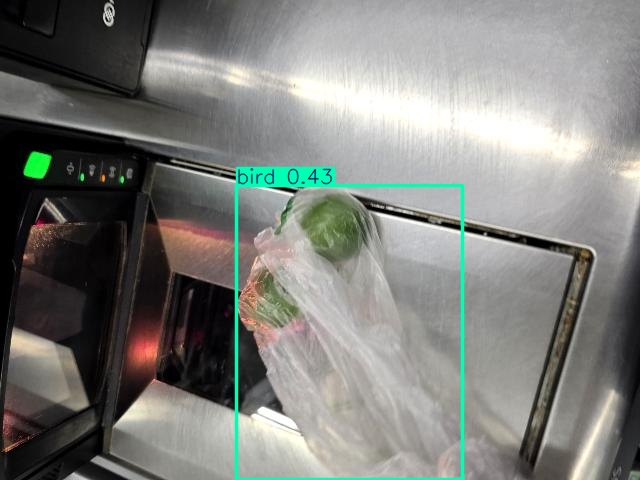

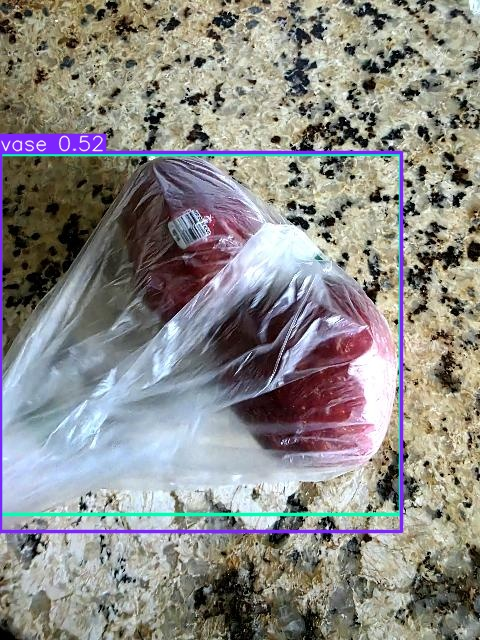

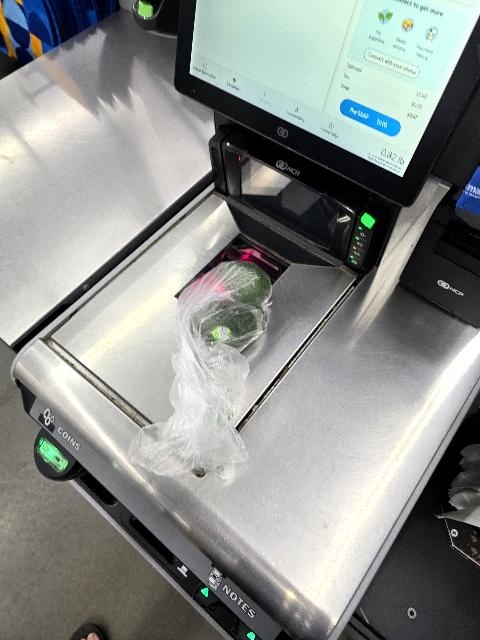

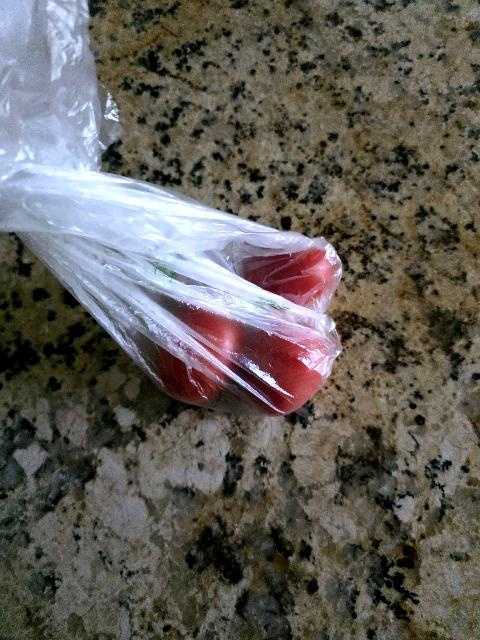

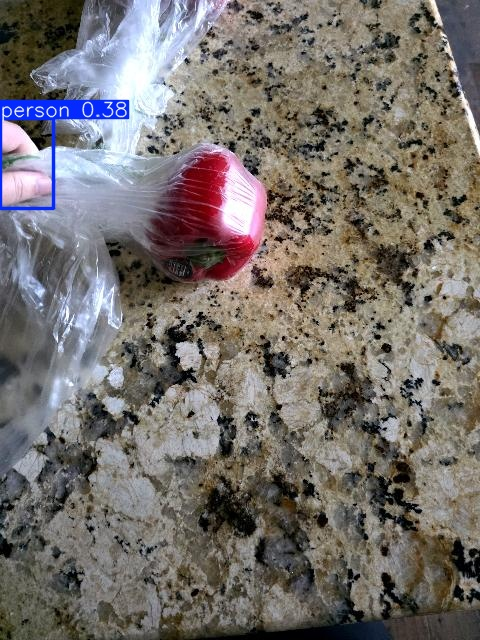

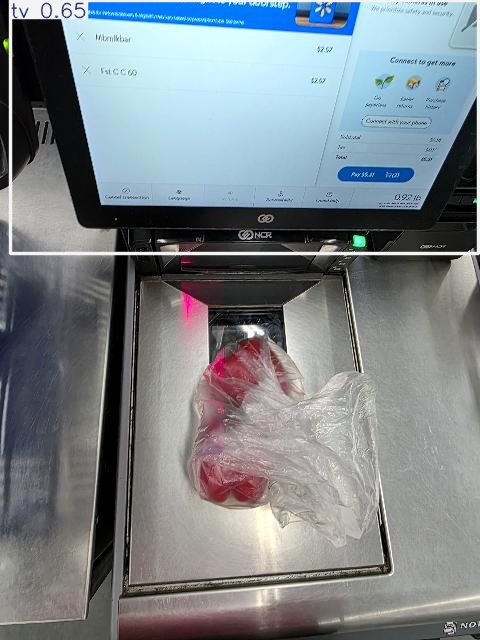

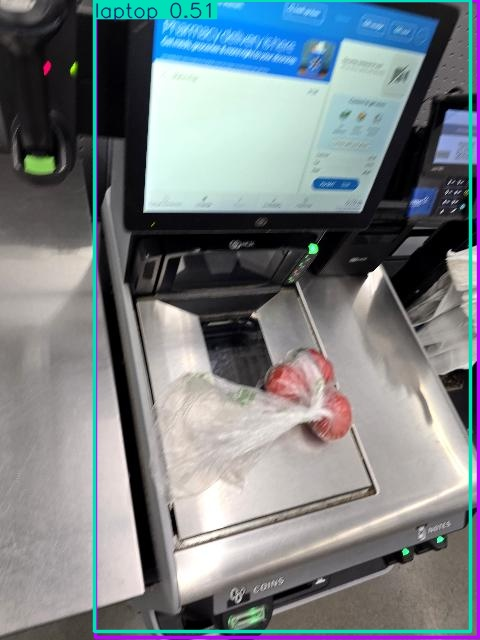

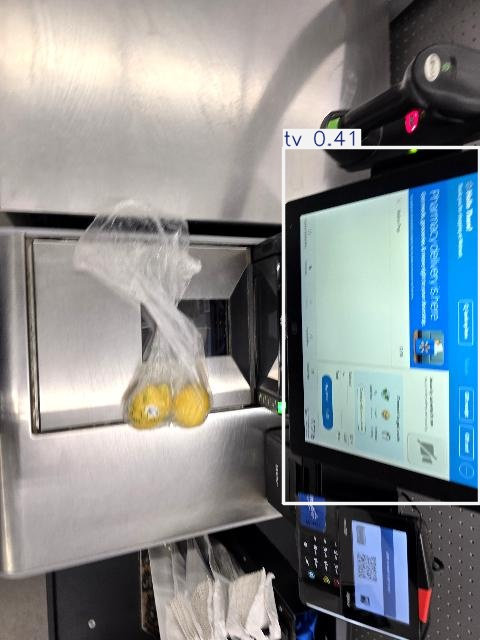

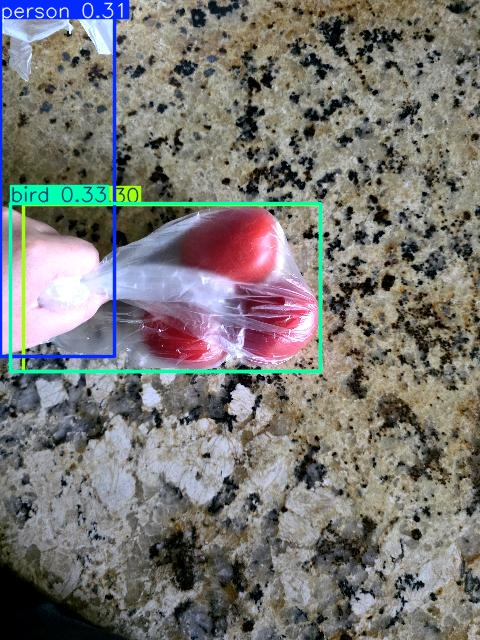

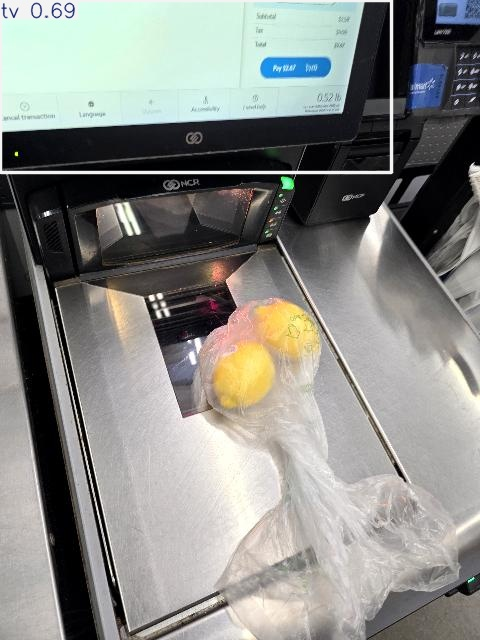

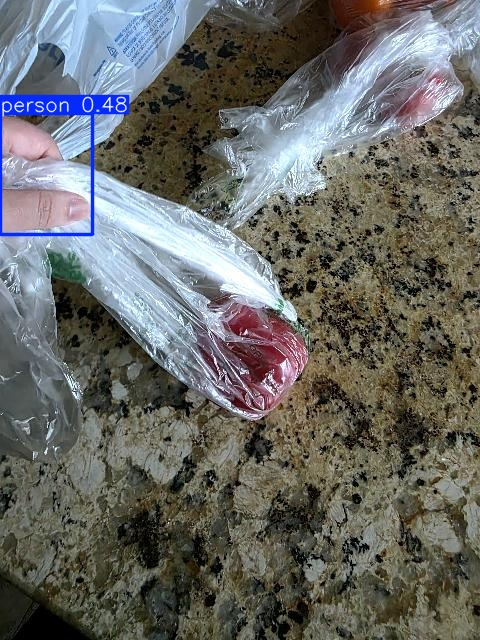

In [ ]:
from IPython.display import Image, display
import os
test_img_run = "/content/runs/detect/roboflow_dataset_yolov8s_pre-train_predictions"
# Get all files in test image directory
tested_images = [f for f in os.listdir(test_img_run)]
count = 0
for img in tested_images:
  count += 1
  display(Image(filename=os.path.join(test_img_run, img)))
  if count > 10:
    break

Fine tune yolov8s on our new dataset

In [ ]:
# Train
!yolo train \
  data="/content/roboflow_dataset2/data.yaml" \
  model=yolov8s.pt \
  epochs=50 \
  batch=64 \
  workers=4 \
  imgsz=640 \
  device=0 \
  name="roboflow_dataset2_yolov8s_train"

Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/roboflow_dataset2/data.yaml, epochs=50, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=roboflow_dataset2_yolov8s_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

Visualize training results

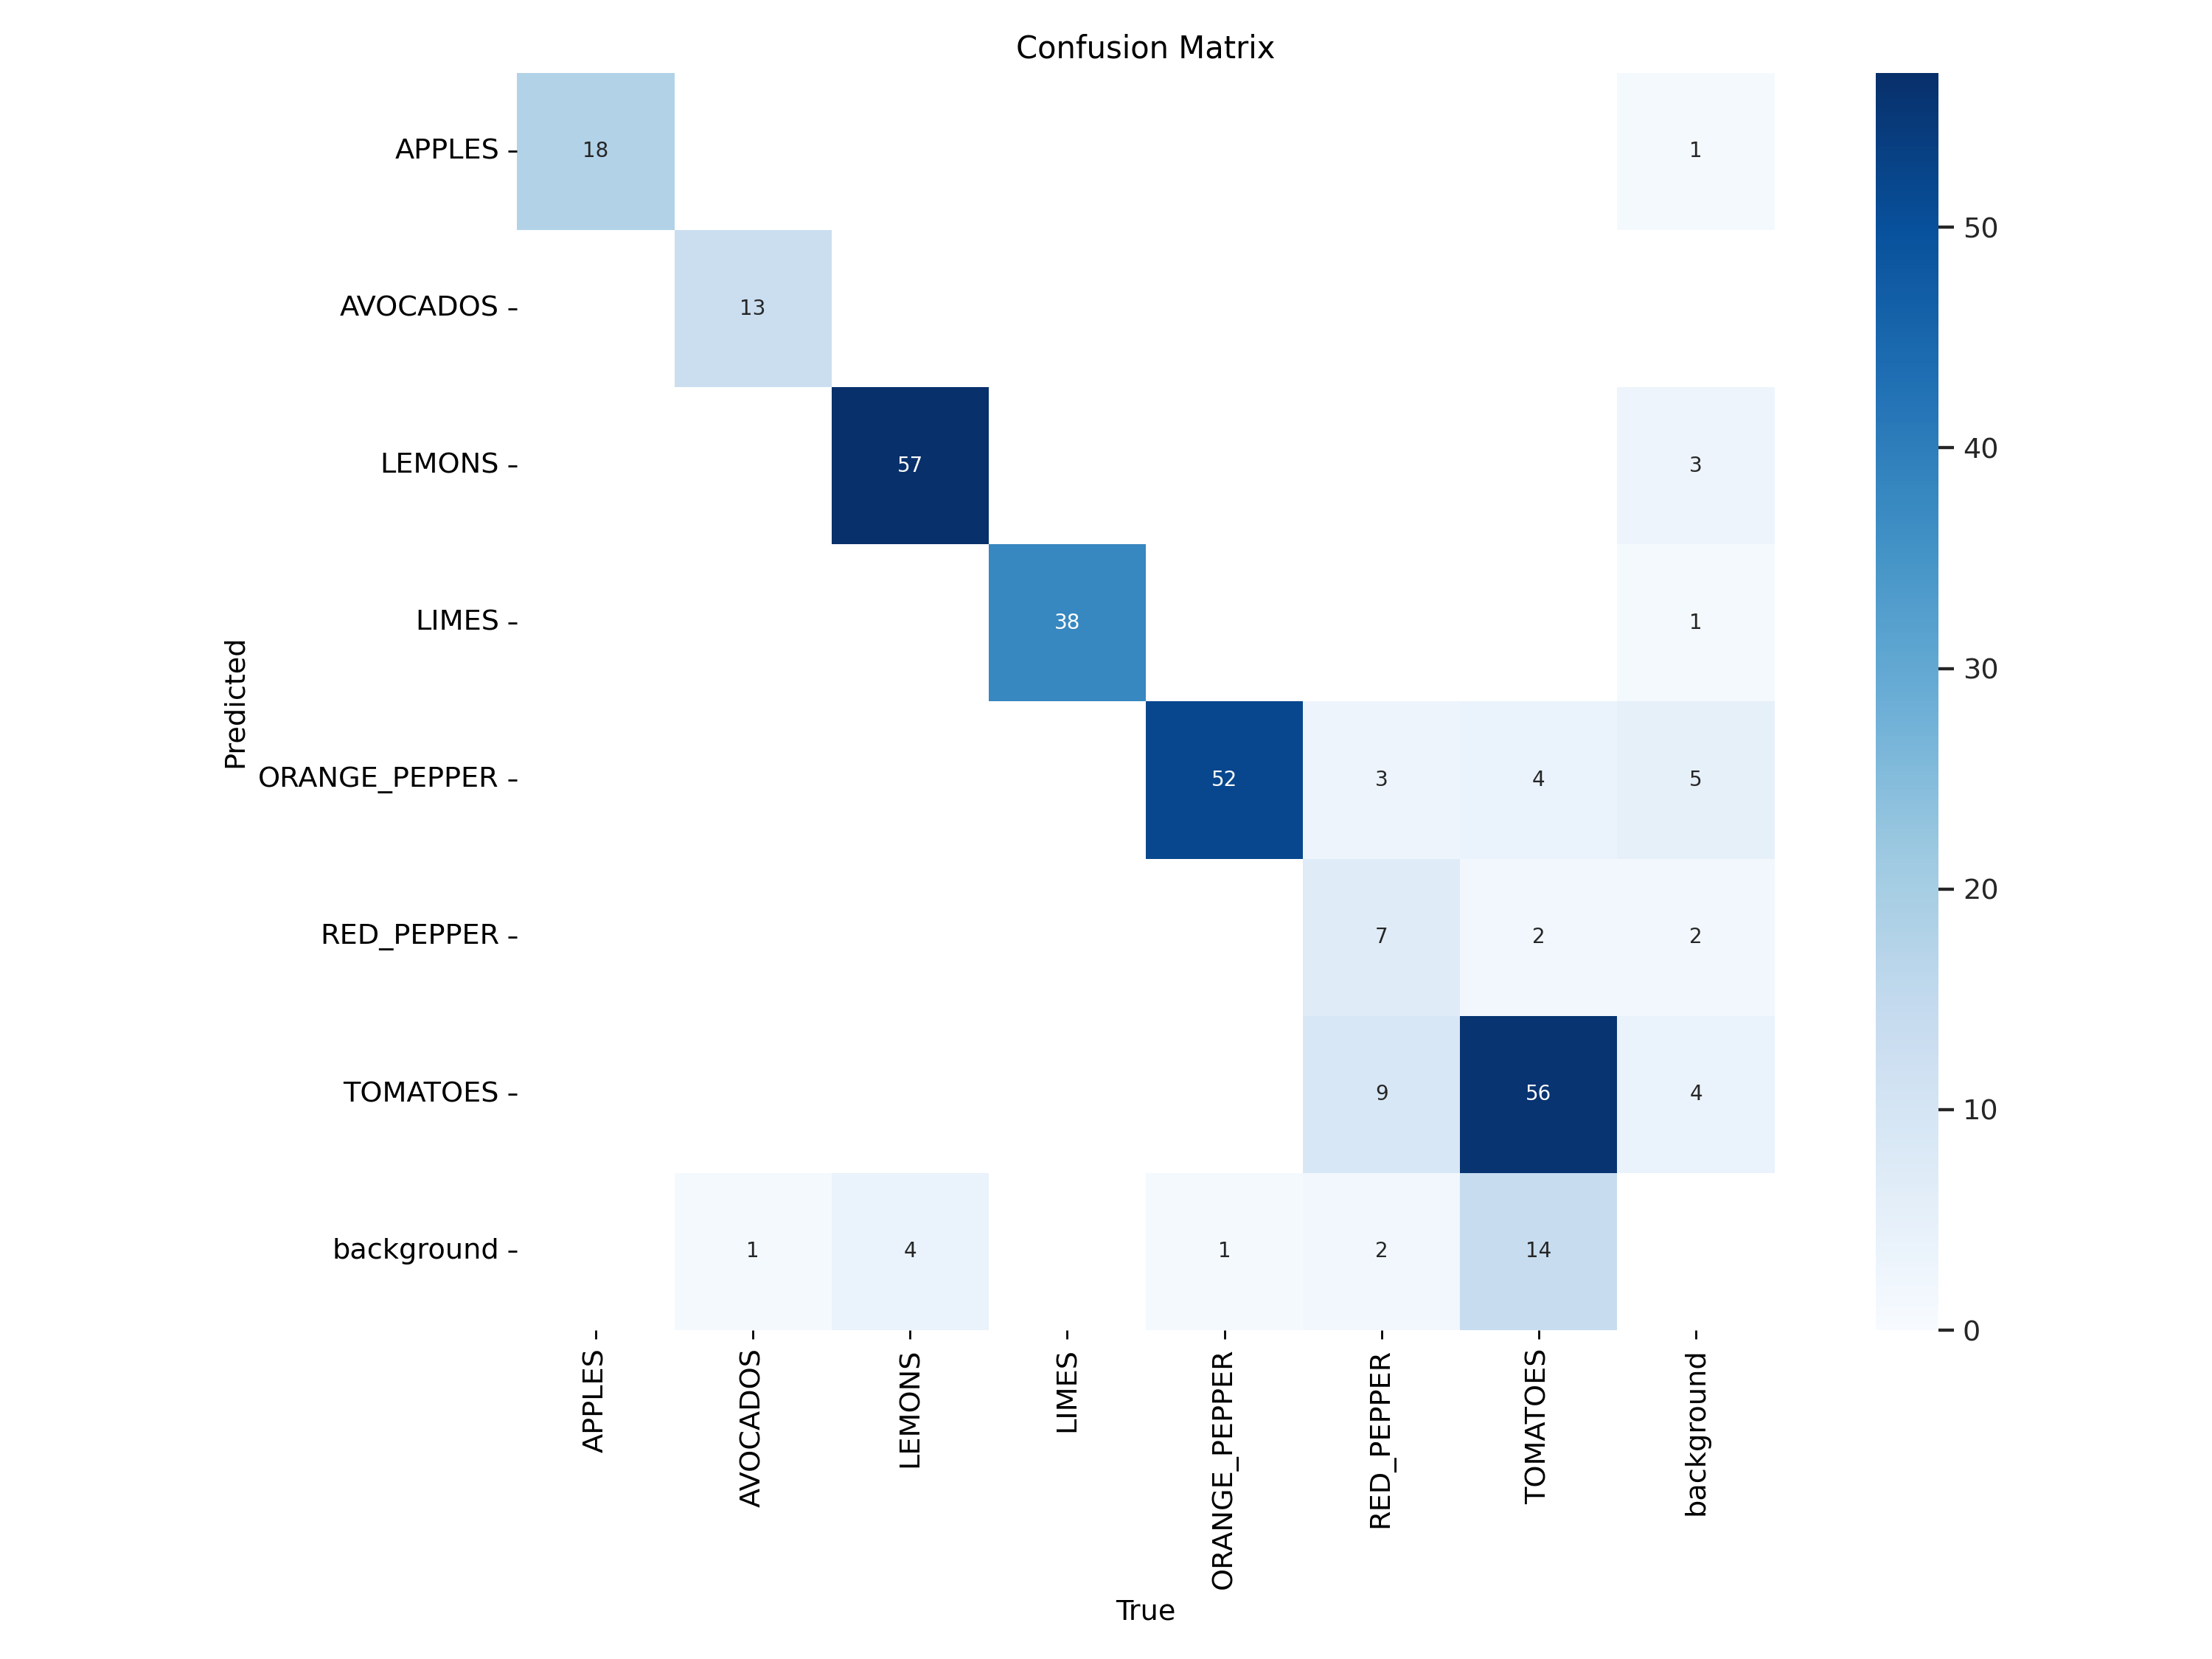

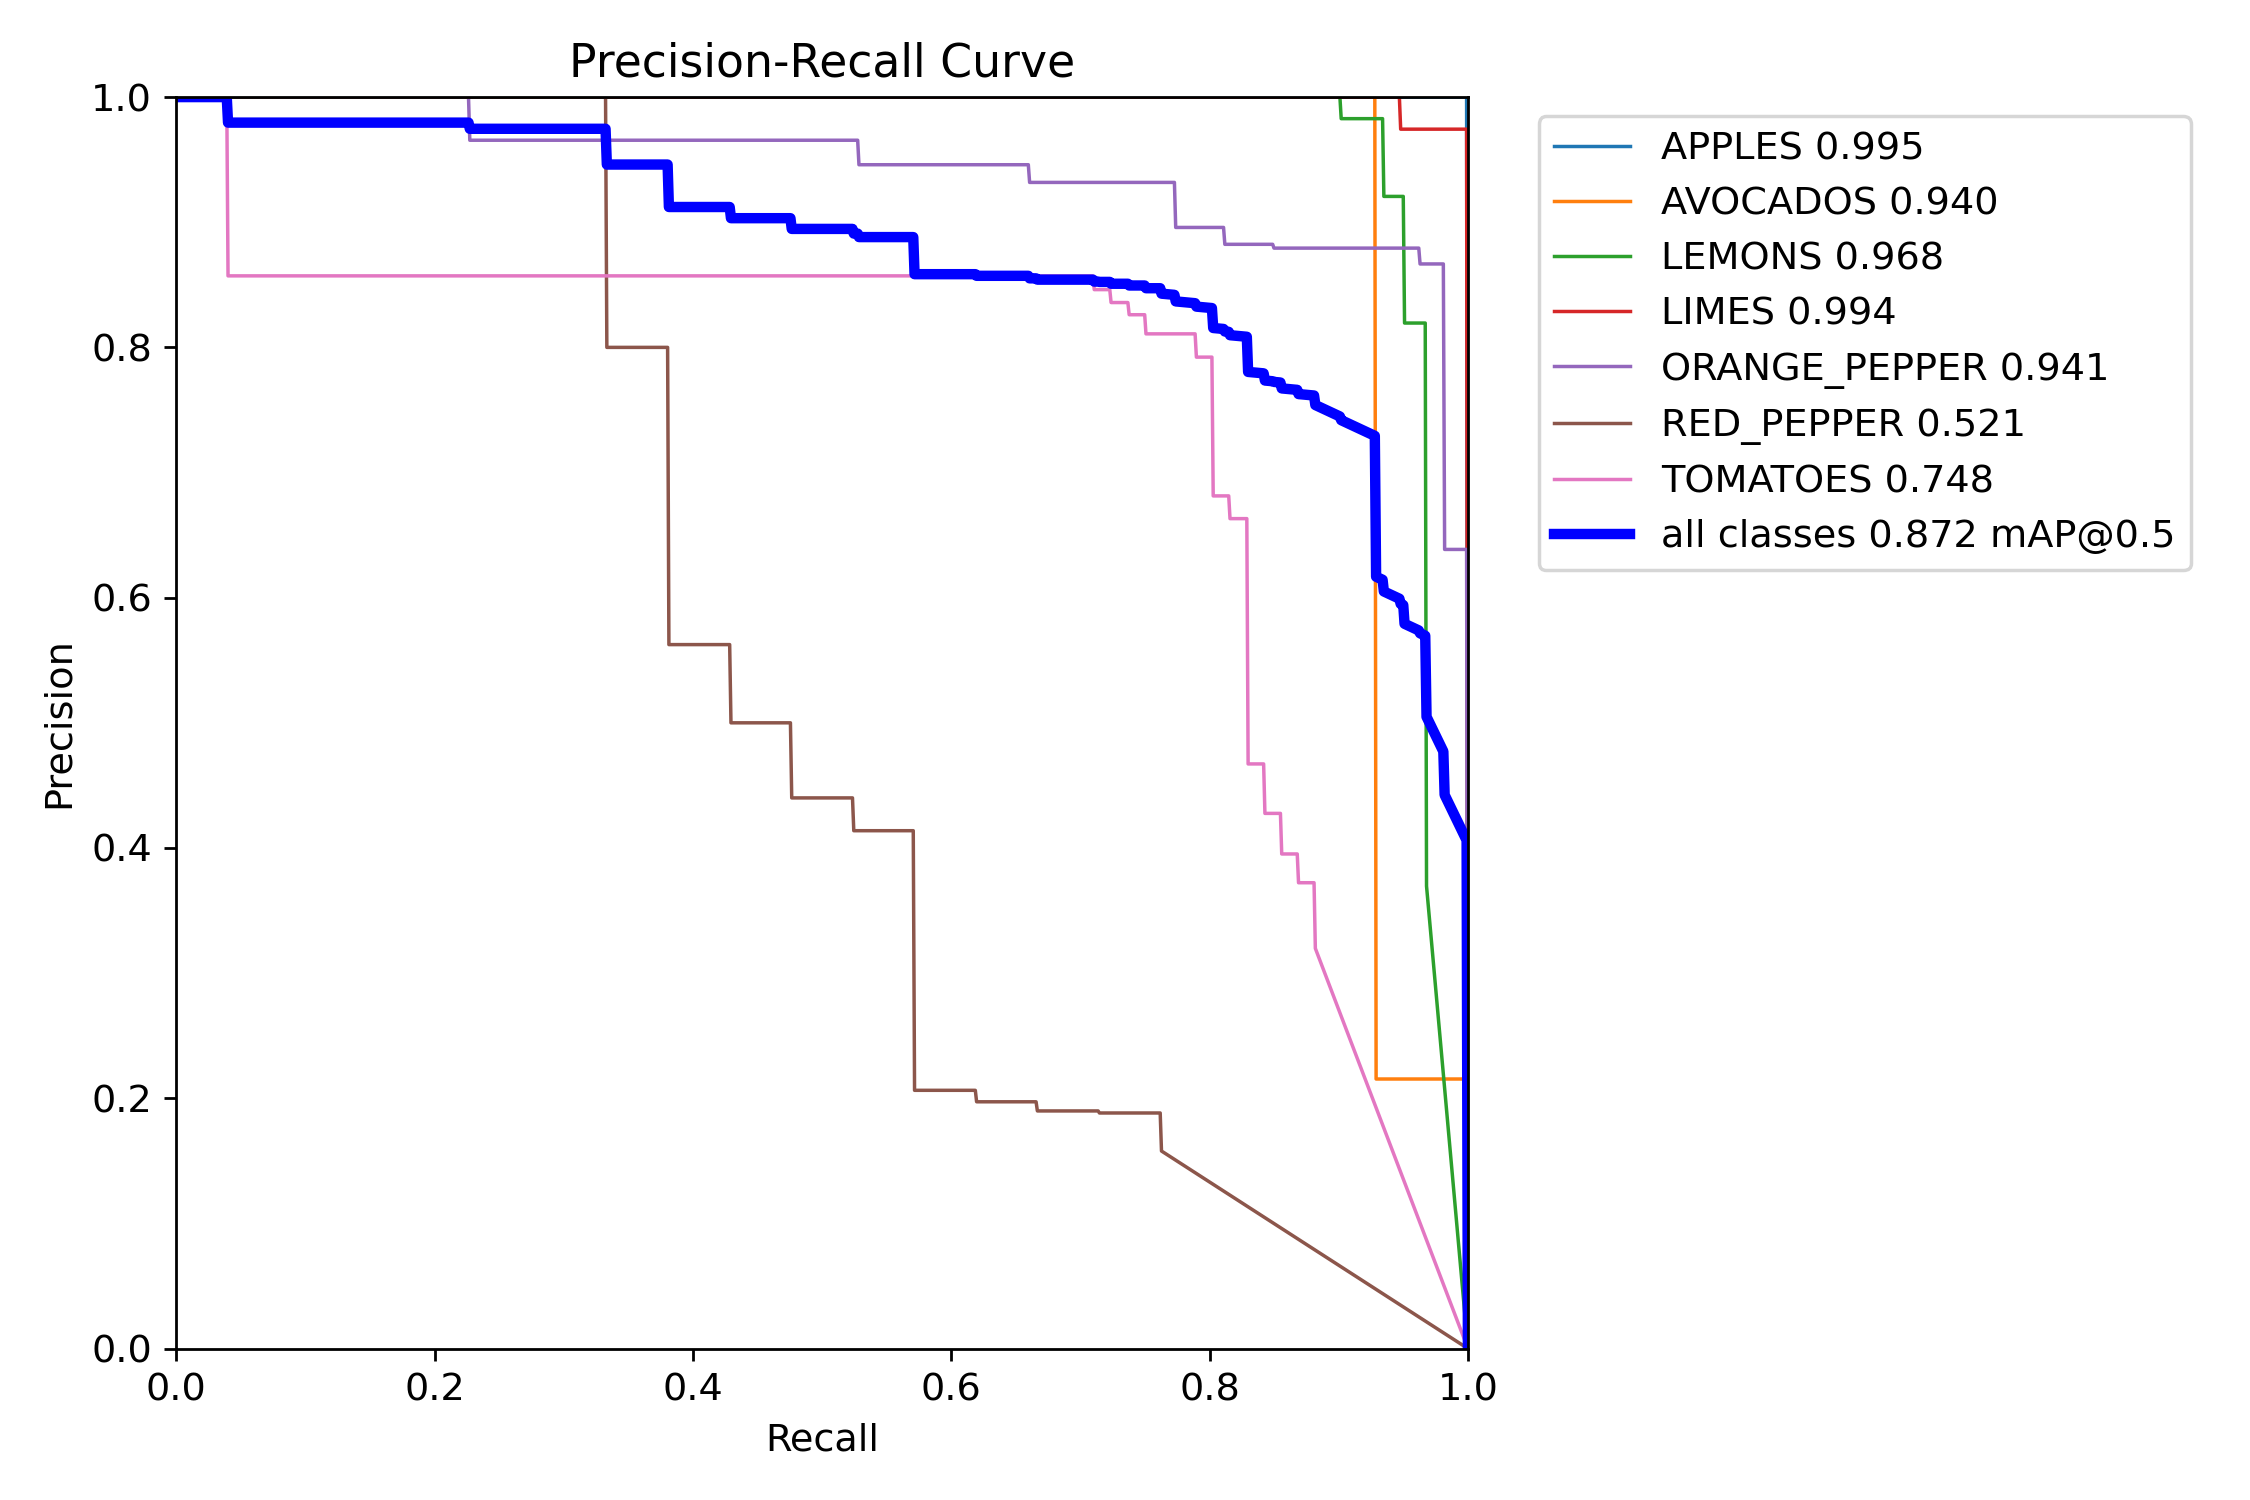

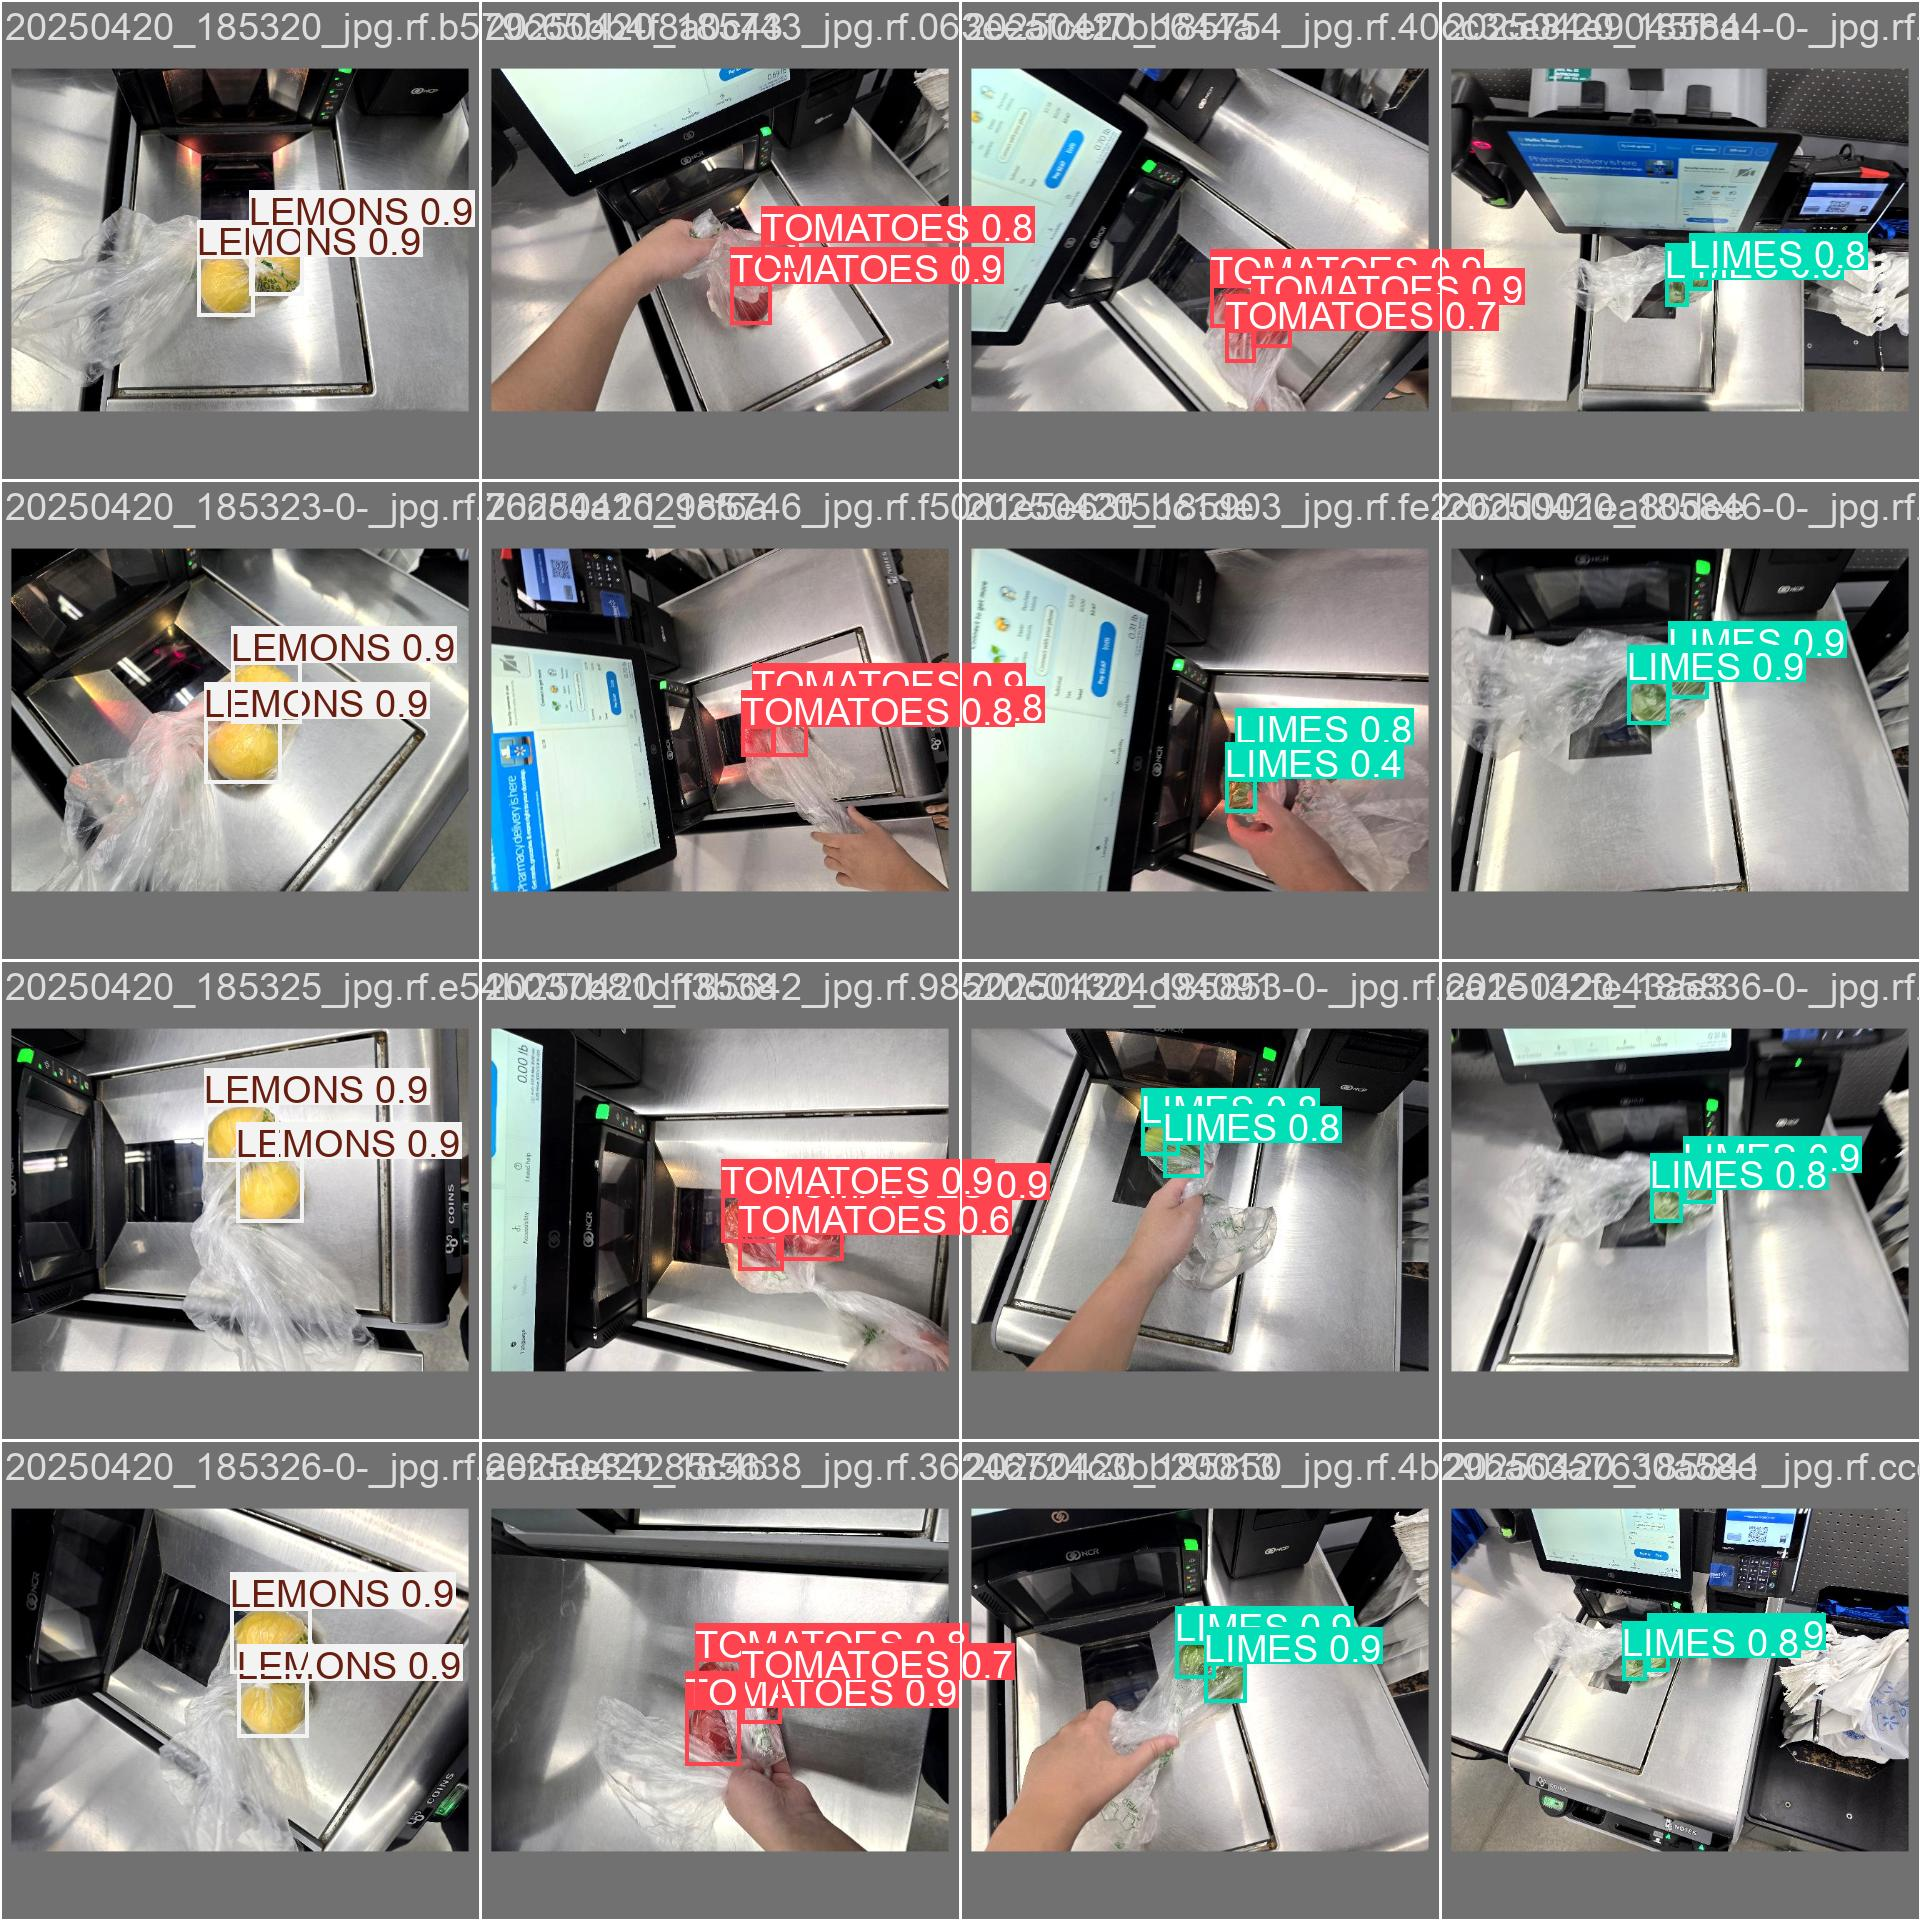

In [ ]:
from IPython.display import Image, display
import os

train_run_dir = "/content/runs/detect/roboflow_dataset2_yolov8s_train"

confusion_matrix_path = os.path.join(train_run_dir, "confusion_matrix.png")
display(Image(filename=confusion_matrix_path, width=600))

pr_curve_path = os.path.join(train_run_dir, "PR_curve.png")
display(Image(filename=pr_curve_path, width=600))

val_pred_path = os.path.join(train_run_dir, "val_batch0_pred.jpg")

display(Image(filename=val_pred_path))

Evaluate fine tuned model on test images

In [ ]:
# Load best weights
model_weights = "/content/runs/detect/roboflow_dataset2_yolov8s_train/weights/best.pt"

# Test images
test_images = "/content/roboflow_dataset2/test/images"

# Evaluate on test images
!yolo predict \
  model="{model_weights}" \
  source="{test_images}" \
  save=True \
  device=0 \
  name="roboflow_dataset2_yolov8s_test_predictions"
  # conf=0.4 # Conf threshold


Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs

image 1/68 /content/roboflow_dataset2/test/images/20250420_185319_jpg.rf.4e52c2d0a01d753a5aaf2bddd0235781.jpg: 480x640 2 LEMONSs, 62.1ms
image 2/68 /content/roboflow_dataset2/test/images/20250420_185321_jpg.rf.0ee54725b15ed3af1cf44b4f61a4fcc1.jpg: 480x640 2 LEMONSs, 7.6ms
image 3/68 /content/roboflow_dataset2/test/images/20250420_185323_jpg.rf.ea844795712b3522cdbfb6cd28eabf81.jpg: 480x640 2 LEMONSs, 8.2ms
image 4/68 /content/roboflow_dataset2/test/images/20250420_185333_jpg.rf.98e1f858c0e227510dafaa987e884108.jpg: 640x480 2 LEMONSs, 75.2ms
image 5/68 /content/roboflow_dataset2/test/images/20250420_185335_jpg.rf.74afc6ef733fe5fd386b14fc05492e09.jpg: 640x480 2 LEMONSs, 7.4ms
image 6/68 /content/roboflow_dataset2/test/images/20250420_185354_jpg.rf.ce3d2dcaf4886138b0a9eb03783a79e3.jpg: 640x480 2 LEMONSs, 7.3ms
image 7/68 /con

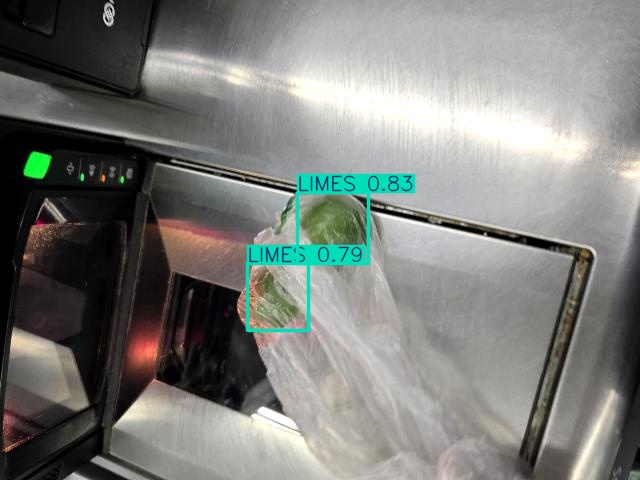

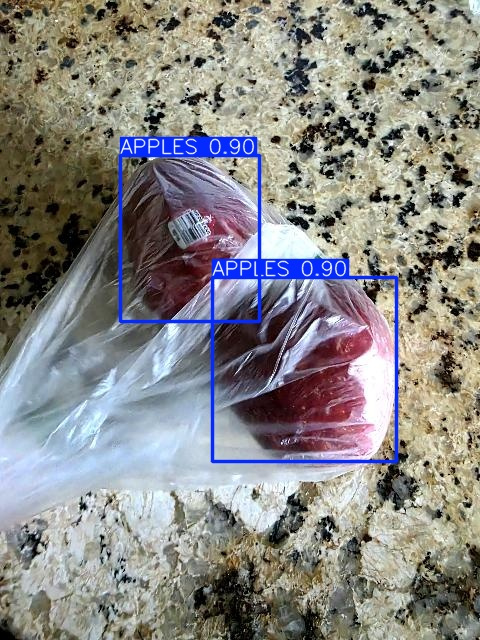

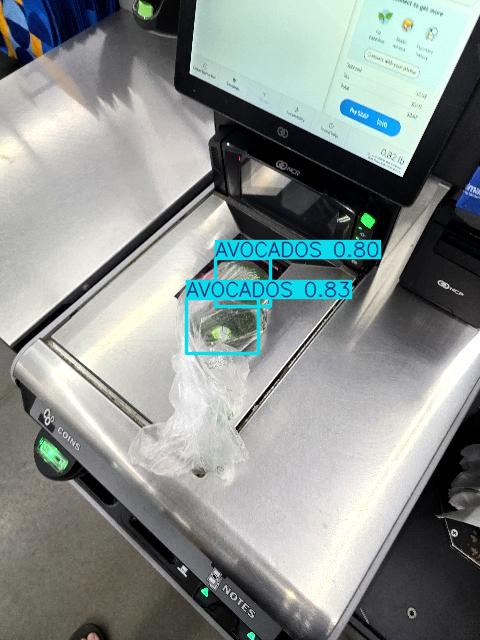

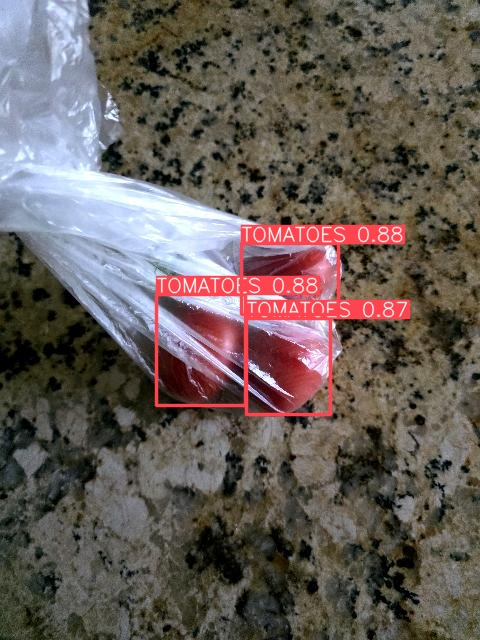

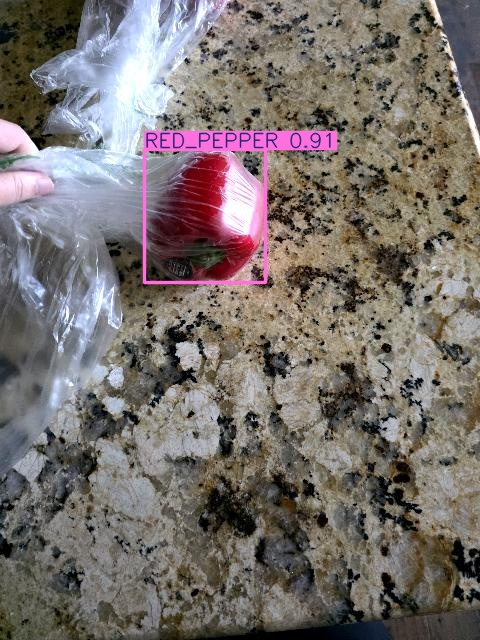

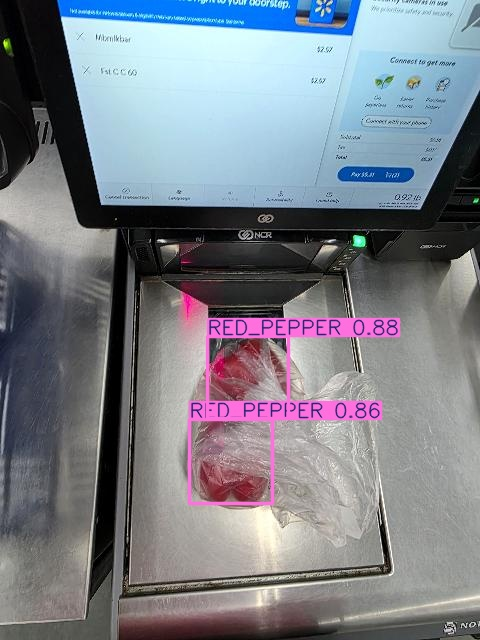

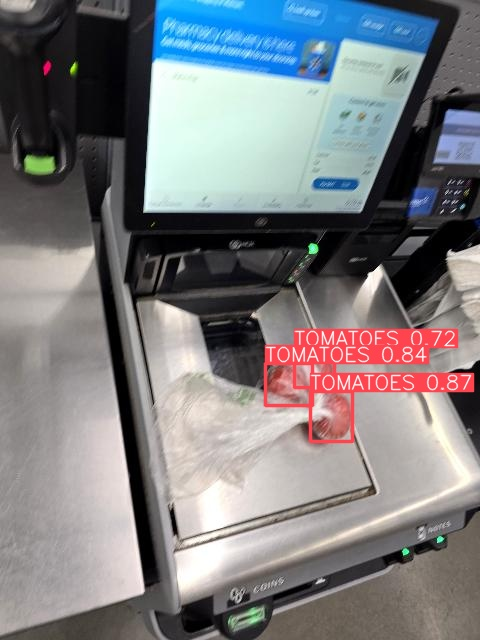

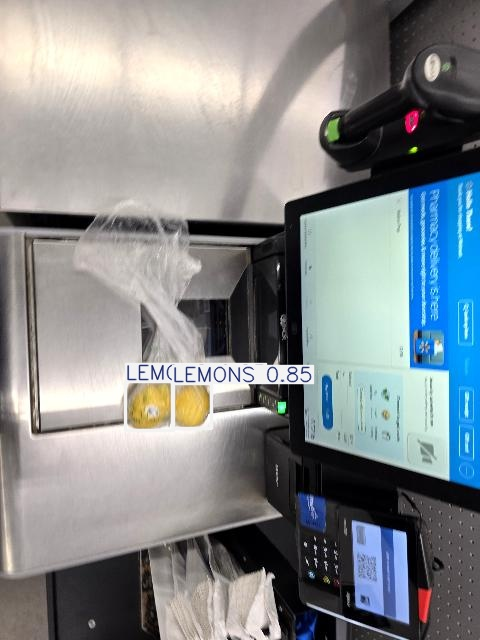

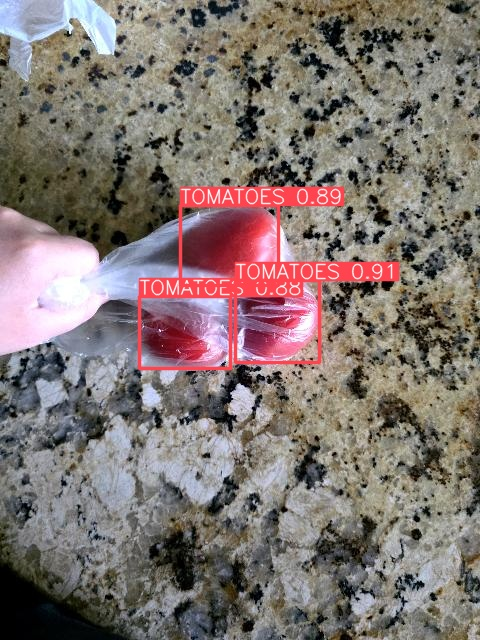

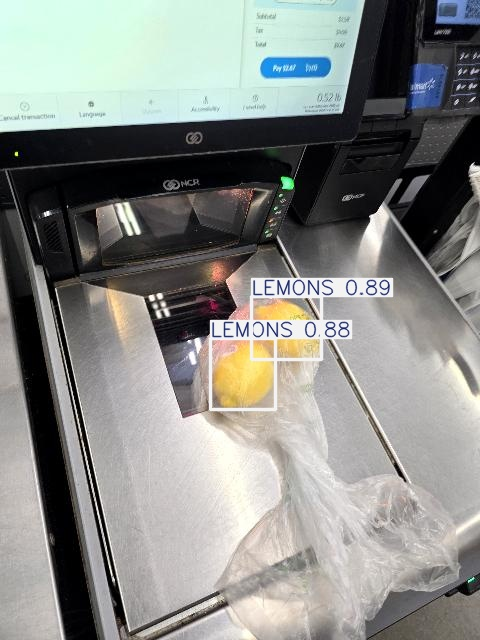

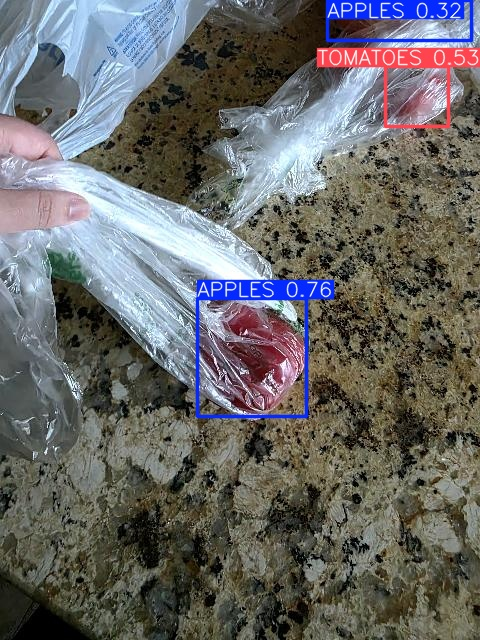

In [ ]:
test_img_run = "/content/runs/detect/roboflow_dataset2_yolov8s_test_predictions"
# Get all files in test image directory
tested_images = [f for f in os.listdir(test_img_run)]
count = 0
for img in tested_images:
  count+=1
  display(Image(filename=os.path.join(test_img_run, img)))
  if count > 10:
    break

This is the final model so far that we've trained. If we had more time we could gather more data to train as well as explore other methods of improving the model (distilling the model from a more complex version?)

In [ ]:
!zip -r yolov8_roboflow_finetune2.zip '/content/runs/detect/roboflow_dataset2_yolov8s_train'

from google.colab import files
files.download('yolov8_roboflow_finetune2.zip')

  adding: content/runs/detect/roboflow_dataset2_yolov8s_train/ (stored 0%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_train/P_curve.png (deflated 9%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_train/confusion_matrix_normalized.png (deflated 22%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_train/labels.jpg (deflated 29%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_train/confusion_matrix.png (deflated 26%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_train/args.yaml (deflated 53%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_train/results.png (deflated 7%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_train/R_curve.png (deflated 9%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_train/weights/ (stored 0%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_train/weights/best.pt (deflated 8%)
  adding: co

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r yolov8_roboflow_finetune2_test_predictions.zip '/content/runs/detect/roboflow_dataset2_yolov8s_test_predictions'

files.download('yolov8_roboflow_finetune2_test_predictions.zip')

  adding: content/runs/detect/roboflow_dataset2_yolov8s_test_predictions/ (stored 0%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_test_predictions/20250420_185915_jpg.rf.a499fbb5be54466562c4d973bf77ff3c.jpg (deflated 4%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_test_predictions/20250420_192744_jpg.rf.a90d060b9606b5e1735277efd807f871.jpg (deflated 5%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_test_predictions/20250420_185622_jpg.rf.57d6cdeba3105128565b3bd755769003.jpg (deflated 4%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_test_predictions/20250420_192820_jpg.rf.f29cf93733baa986e871ffb9b3118866.jpg (deflated 4%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_test_predictions/20250420_192900_jpg.rf.9929047d49a191a56de18109f2452328.jpg (deflated 5%)
  adding: content/runs/detect/roboflow_dataset2_yolov8s_test_predictions/REDPEPPER_MD_50_jpg.rf.6d79ef8502eb5024d4f2893a45fa5f08.jpg (deflated 5%)
  adding: content/runs/detect/ro

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>